In [75]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
import unidecode
def remove_accents(a):
    return unidecode.unidecode(a)
import glob

from networkx.algorithms.community import louvain_communities
from networkx.algorithms.community.quality import modularity
import matplotlib.colors as mcolors
import random


- NroLicitacion
- TipoLicitacion
- MonedaLicitacion
- MontoEstimadoLicitacion
- EstadoLicitacion
- MonedaLicitacion
- Institucion
- Proveedor
- ActividadProveedor
- TamanoProveedor
- EstadoOferta
- MontoTotalOferta
- ResultadoOferta

In [5]:
# Listar los archivos a revisión y concatenación

# Ruta de los archivos CSV
ruta_archivos = 'C:/Users/Paula/Documents/Diplomado UDD/3° Trimestre/Ciencia de Redes/Tarea Final/Licitaciones/*.csv'

# Usamos glob para listar todos los archivos encontrados
lista_archivos = glob.glob(ruta_archivos)
lista_archivos

['C:/Users/Paula/Documents/Diplomado UDD/3° Trimestre/Ciencia de Redes/Tarea Final/Licitaciones\\04LicitacionesAbr2022_1sem.csv',
 'C:/Users/Paula/Documents/Diplomado UDD/3° Trimestre/Ciencia de Redes/Tarea Final/Licitaciones\\04LicitacionesAbr2023_1sem.csv',
 'C:/Users/Paula/Documents/Diplomado UDD/3° Trimestre/Ciencia de Redes/Tarea Final/Licitaciones\\04LicitacionesAgo2022_2sem.csv',
 'C:/Users/Paula/Documents/Diplomado UDD/3° Trimestre/Ciencia de Redes/Tarea Final/Licitaciones\\04LicitacionesAgo2023_2sem.csv',
 'C:/Users/Paula/Documents/Diplomado UDD/3° Trimestre/Ciencia de Redes/Tarea Final/Licitaciones\\04LicitacionesDic2022_2sem.csv',
 'C:/Users/Paula/Documents/Diplomado UDD/3° Trimestre/Ciencia de Redes/Tarea Final/Licitaciones\\04LicitacionesDic2023_2sem.csv',
 'C:/Users/Paula/Documents/Diplomado UDD/3° Trimestre/Ciencia de Redes/Tarea Final/Licitaciones\\04LicitacionesEne2022_1sem.csv',
 'C:/Users/Paula/Documents/Diplomado UDD/3° Trimestre/Ciencia de Redes/Tarea Final/Licitac

In [6]:
# Data frame total de los datos de las licitaciones

# Ruta de los archivos CSV
ruta_archivos = 'C:/Users/Paula/Documents/Diplomado UDD/3° Trimestre/Ciencia de Redes/Tarea Final/Licitaciones/*.csv'

# Lista de columnas que queremos leer
columnas_deseadas = [
    'NroLicitacion', 'TipoLicitacion', 'MonedaLicitacion', 'MontoEstimadoLicitacion', 
    'EstadoLicitacion', 'Institucion', 'Proveedor',     'ActividadProveedor',
    'TamanoProveedor', 'EstadoOferta', 'MontoTotalOferta', 'ResultadoOferta',
    'RubroN1'
]

# Leemos y concatenamos los archivos en un solo DataFrame, ignorando filas con errores
df_concatenado = pd.concat([pd.read_csv(archivo, sep=';', encoding='ISO-8859-1', usecols=columnas_deseadas, on_bad_lines='skip') 
                            for archivo in lista_archivos], ignore_index=True)

# Mostrar las primeras filas del DataFrame concatenado
df_concatenado.head(1)

C:\Users\Paula\AppData\Local\Temp\ipykernel_12316\2858376552.py:15: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df_concatenado = pd.concat([pd.read_csv(archivo, sep=';', encoding='ISO-8859-1', usecols=columnas_deseadas, on_bad_lines='skip')


,NroLicitacion,TipoLicitacion,MonedaLicitacion,MontoEstimadoLicitacion,EstadoLicitacion,Institucion,RubroN1,Proveedor,ActividadProveedor,TamanoProveedor,EstadoOferta,MontoTotalOferta,ResultadoOferta
0,2585-122-LE21,Licitación Pública Entre 100 y 1000 UTM (LE),CLP,5184000,Adjudicada,I MUNICIPALIDAD DE ARICA,"Tecnologías de la información, telecomunicacio...",MOYA CONTRERAS ANGEL GABRIEL Y OTRO,VENTA AL POR MAYOR DE OTROS PRODUCTOS N.C.P.| ...,Pequeña,Aceptada,1,Ganadora


In [7]:
df_concatenado.shape

(5381646, 13)

In [8]:
print(df_concatenado.dtypes)

NroLicitacion              object
TipoLicitacion             object
MonedaLicitacion           object
MontoEstimadoLicitacion     int64
EstadoLicitacion           object
Institucion                object
RubroN1                    object
Proveedor                  object
ActividadProveedor         object
TamanoProveedor            object
EstadoOferta               object
MontoTotalOferta           object
ResultadoOferta            object
dtype: object


In [9]:
df_concatenado['MontoTotalOferta'] = df_concatenado['MontoTotalOferta'].str.replace(',', '.').astype(float)

In [10]:
print(df_concatenado.dtypes)

NroLicitacion               object
TipoLicitacion              object
MonedaLicitacion            object
MontoEstimadoLicitacion      int64
EstadoLicitacion            object
Institucion                 object
RubroN1                     object
Proveedor                   object
ActividadProveedor          object
TamanoProveedor             object
EstadoOferta                object
MontoTotalOferta           float64
ResultadoOferta             object
dtype: object


In [11]:
# Data frame que limpia la columna de Nrolicitaciones. Evita repeticiones
#como filas con mismos datos, excepto el monto ofertado. 
df_licitaciones = df_concatenado.drop_duplicates(subset=['NroLicitacion', 'Institucion', 'Proveedor'])

# Mostrar el DataFrame filtrado
df_licitaciones.head(1)

,NroLicitacion,TipoLicitacion,MonedaLicitacion,MontoEstimadoLicitacion,EstadoLicitacion,Institucion,RubroN1,Proveedor,ActividadProveedor,TamanoProveedor,EstadoOferta,MontoTotalOferta,ResultadoOferta
0,2585-122-LE21,Licitación Pública Entre 100 y 1000 UTM (LE),CLP,5184000,Adjudicada,I MUNICIPALIDAD DE ARICA,"Tecnologías de la información, telecomunicacio...",MOYA CONTRERAS ANGEL GABRIEL Y OTRO,VENTA AL POR MAYOR DE OTROS PRODUCTOS N.C.P.| ...,Pequeña,Aceptada,1.0,Ganadora


In [12]:
df_licitaciones.shape

(581884, 13)

In [13]:
df_licitaciones['RubroN1'].value_counts()

RubroN1
Equipamiento y suministros médicos                                                                         63530
Tecnologías de la información, telecomunicaciones y radiodifusión                                          56809
Medicamentos y productos farmacéuticos                                                                     44363
Servicios de construcción y mantenimiento                                                                  34528
Artículos para estructuras, obras y construcciones                                                         31012
Servicios profesionales, administrativos y consultorías de gestión empresarial                             28047
Equipos, accesorios y suministros de oficina                                                               24466
Muebles y mobiliario                                                                                       17754
Artículos de fabricación y producción                                                   

In [14]:
# Dataframe con solo los municipios de la Región de Los Lagos

# Lista de instituciones que quieres filtrar
instituciones = [
    'CORP MUNICIPAL DE CASTRO PARA LA EDUCACION SALUD Y ATENCION AL MENOR',
    'I MUNICIPALIDAD DE ANCUD',
    'I MUNICIPALIDAD DE CALBUCO',
    'I MUNICIPALIDAD DE CASTRO',
    'I MUNICIPALIDAD DE CHAITEN',
    'I MUNICIPALIDAD DE CHONCHI',
    'I MUNICIPALIDAD DE CURACO DE VELEZ',
    'I MUNICIPALIDAD DE DALCAHUE',
    'I MUNICIPALIDAD DE FRESIA',
    'I MUNICIPALIDAD DE FRUTILLAR',
    'I MUNICIPALIDAD DE FUTALEUFU',
    'I MUNICIPALIDAD DE HUALAIHUE',
    'I MUNICIPALIDAD DE LLANQUIHUE',
    'I MUNICIPALIDAD DE LOS LAGOS',
    'I MUNICIPALIDAD DE LOS MUERMOS',
    'I MUNICIPALIDAD DE MAULLIN',
    'I MUNICIPALIDAD DE OSORNO',
    'I MUNICIPALIDAD DE PALENA',
    'I MUNICIPALIDAD DE PUERTO MONTT',
    'I MUNICIPALIDAD DE PUERTO VARAS',
    'I MUNICIPALIDAD DE PUQUELDON',
    'I MUNICIPALIDAD DE PURRANQUE',
    'I MUNICIPALIDAD DE QUEILEN',
    'I MUNICIPALIDAD DE QUEMCHI',
    'I MUNICIPALIDAD DE QUINCHAO',
    'I MUNICIPALIDAD DE RIO NEGRO',
    'I MUNICIPALIDAD DE SAN PABLO',
    'I MUNICIPALIDAD PUERTO OCTAY',
    'Ilustre Municipalidad De Quellón',
    'Ilustre Municipalidad de San Juan de la Costa'
]

# Filtrar el DataFrame con las instituciones mencionadas
loslagos = df_licitaciones[df_licitaciones['Institucion'].isin(instituciones)]

loslagos.head(1)

,NroLicitacion,TipoLicitacion,MonedaLicitacion,MontoEstimadoLicitacion,EstadoLicitacion,Institucion,RubroN1,Proveedor,ActividadProveedor,TamanoProveedor,EstadoOferta,MontoTotalOferta,ResultadoOferta
304,2289-13-LE22,Licitación Pública Entre 100 y 1000 UTM (LE),CLP,7563025,Adjudicada,I MUNICIPALIDAD DE FRUTILLAR,"Servicios de transporte, almacenaje y correo",SOCIEDAD INGENIERÍA OTTO WERKE LIMITADA,mantenimiento y reparación de vehículos,Micro,Aceptada,12818308.0,Perdedora


In [15]:
loslagos.shape

(36967, 13)

In [16]:
# Agrupar por 'RubroN1' y 'Proveedor', luego contar la cantidad de proveedores por cada área
proveedores_por_area = loslagos.groupby('RubroN1')['Proveedor'].nunique()

# Ordenar el resultado para ver qué áreas tienen más proveedores participantes
proveedores_por_area_sorted = proveedores_por_area.sort_values(ascending=False)

# Guardar el resultado en un archivo CSV
#proveedores_por_area_sorted.to_excel('proveedores_por_area.xlsx', index=True)

# Mostrar el resultado
proveedores_por_area_sorted


RubroN1
Servicios profesionales, administrativos y consultorías de gestión empresarial                             1011
Servicios de construcción y mantenimiento                                                                   879
Equipamiento y suministros médicos                                                                          687
Artículos para estructuras, obras y construcciones                                                          611
Tecnologías de la información, telecomunicaciones y radiodifusión                                           499
Servicios de transporte, almacenaje y correo                                                                463
Artículos eléctricos y de iluminación                                                                       347
Artículos de fabricación y producción                                                                       334
Ropa, maletas y productos de aseo personal                                                      

In [17]:
# Agrupar por 'RubroN1' y 'N°Licitacion', luego contar la cantidad de licitaciones por cada área

licitaciones_por_area = loslagos.groupby('RubroN1')['NroLicitacion'].nunique()

# Ordenar el resultado para ver qué áreas tienen más proveedores participantes
licitaciones_por_area_sorted = licitaciones_por_area.sort_values(ascending=False)

# Guardar el resultado en un archivo CSV
#licitaciones_por_area_sorted.to_excel('licitaciones_por_area.xlsx', index=True)

# Mostrar el resultado
licitaciones_por_area_sorted


RubroN1
Servicios de construcción y mantenimiento                                                                  1080
Servicios profesionales, administrativos y consultorías de gestión empresarial                              694
Equipamiento y suministros médicos                                                                          623
Servicios de transporte, almacenaje y correo                                                                590
Artículos para estructuras, obras y construcciones                                                          532
Tecnologías de la información, telecomunicaciones y radiodifusión                                           506
Equipos, accesorios y suministros de oficina                                                                379
Artículos de fabricación y producción                                                                       344
Vehículos y equipamiento en general                                                             

### Licitaciones región de Los Lagos, en el área de Servicios de Construcción. 

### Etapa de Participación

In [20]:
# Dataframe solo con los municipios de la Región y el rubro Servicio de Construcción... 

# Rubro que quieres filtrar
rubro = ['Servicios de construcción y mantenimiento']    
    
# Filtrar el DataFrame con las instituciones mencionadas
participacion = loslagos[loslagos['RubroN1'].isin(rubro)]

participacion.head(1)

,NroLicitacion,TipoLicitacion,MonedaLicitacion,MontoEstimadoLicitacion,EstadoLicitacion,Institucion,RubroN1,Proveedor,ActividadProveedor,TamanoProveedor,EstadoOferta,MontoTotalOferta,ResultadoOferta
8744,966131-22-LP22,Licitación Pública Mayor 1000 UTM (LP),CLP,74757825,Adjudicada,I MUNICIPALIDAD DE CASTRO,Servicios de construcción y mantenimiento,SOCIEDAD INMOBILIARIA Y CONSTRUCCIONES ASGARD SPA,REPARACION DE MAQUINARIA AGROPECUARIA Y FORESTAL,Micro,Aceptada,74757825.0,Ganadora


In [21]:
# Generar un excel en relación al dataframe
try:
    participacion.to_excel('participacion_lic.xlsx', index=False)  # index=False para no incluir el índice del DataFrame en el archivo
    
    print("Archivo Excel creado con éxito.")
except Exception as e:
    print(f"Error al crear el archivo Excel: {e}")

Archivo Excel creado con éxito.


In [22]:
def plot_degree_distribution(G, title):
    degrees = [deg for node, deg in G.degree()]
    degree_count = np.bincount(degrees)
    degree = np.arange(len(degree_count))

    # Filtrar los grados no cero para evitar log10(0)
    nonzero_indices = degree_count > 0
    degree = degree[nonzero_indices]
    degree_count = degree_count[nonzero_indices]

    plt.figure(figsize=(12, 6))

    # Escala lineal
    plt.subplot(1, 2, 1)
    plt.plot(degree, degree_count, 'o')
    plt.title(f'{title} - Degree Distribution (Linear Scale)')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')

    # Escala log-log
    plt.subplot(1, 2, 2)
    plt.loglog(degree, degree_count, 'o')
    plt.title(f'{title} - Degree Distribution (Log-Log Scale)')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


### Etapa Ganadores

In [24]:
# Filtrar de la variable 'ResultadoOferta' el valor 'Ganadora'
empresa_ganadora = participacion[participacion['ResultadoOferta'] == 'Ganadora']

# Mostrar las primeras filas del DataFrame filtrado
empresa_ganadora.head(1)

,NroLicitacion,TipoLicitacion,MonedaLicitacion,MontoEstimadoLicitacion,EstadoLicitacion,Institucion,RubroN1,Proveedor,ActividadProveedor,TamanoProveedor,EstadoOferta,MontoTotalOferta,ResultadoOferta
8744,966131-22-LP22,Licitación Pública Mayor 1000 UTM (LP),CLP,74757825,Adjudicada,I MUNICIPALIDAD DE CASTRO,Servicios de construcción y mantenimiento,SOCIEDAD INMOBILIARIA Y CONSTRUCCIONES ASGARD SPA,REPARACION DE MAQUINARIA AGROPECUARIA Y FORESTAL,Micro,Aceptada,74757825.0,Ganadora


In [25]:
empresa_ganadora.shape

(1060, 13)

In [26]:
# Generar un excel en relación al dataframe
try:
    empresa_ganadora.to_excel('resultados_lic.xlsx', index=False)  # index=False para no incluir el índice del DataFrame en el archivo
    
    print("Archivo Excel creado con éxito.")
except Exception as e:
    print(f"Error al crear el archivo Excel: {e}")

Archivo Excel creado con éxito.


In [71]:
def calculate_basic_measures(G):
    N = G.number_of_nodes()
    L = G.number_of_edges()
    degrees = [deg for node, deg in G.degree()]
    kmin = min(degrees)
    kmax = max(degrees)
    mean_degree = np.mean(degrees)
    print("**********************************")
    print(f"Número de nodos: {N}")
    print(f"Número de enlaces: {L}")
    print(f"Grado mínimo: {kmin}")
    print(f"Grado máximo: {kmax}")
    print(f"Grado promedio: {mean_degree}")
    print("**********************************")    

### Pregunta de investigación

**¿Qué **proveedores** tienden a competir en las licitaciones
organizadas por los mismos **municipios**, y cuáles de estos
proveedores tienen una influencia central o forman grupos
dentro de las comunidades de competencia?**

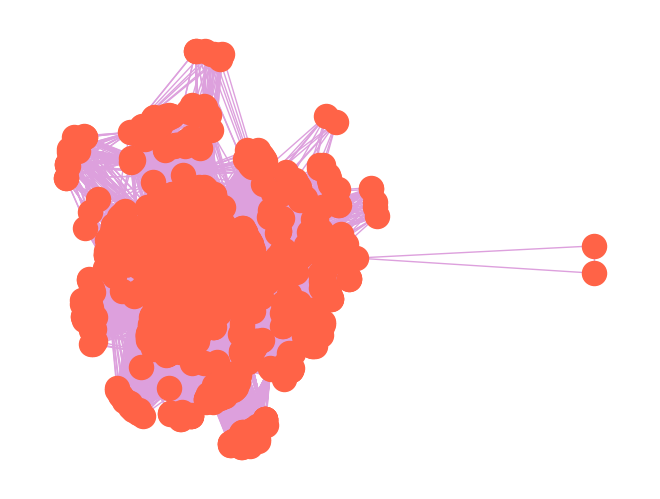

In [84]:
# Crear un grafo bipartito entre municipios e instituciones

G_bipartito = nx.Graph()
for index, row in participacion.iterrows():
    G_bipartito.add_edge(row['Institucion'], row['Proveedor'])

# Proyectar el grafo bipartito sobre los proveedores
# Crearemos un grafo de proveedores conectados si han postulado en la misma institución
G_proveedores = nx.bipartite.weighted_projected_graph(G_bipartito, participacion['Proveedor'].unique())

# Visualización básica del grafo (opcional)

#nx.draw(G_proveedores, with_labels=False)
nx.draw(G_proveedores, with_labels=False, node_color='tomato', edge_color='plum')

In [30]:
# Generar archivo excel del grafo 
# Crear una lista de aristas (conexiones) con sus pesos
edges = [(u, v, d['weight']) for u, v, d in G_proveedores.edges(data=True)]

# Convertir a un DataFrame
df_edges = pd.DataFrame(edges, columns=['Proveedor 1', 'Proveedor 2', 'Peso'])

# Guardar el DataFrame como un archivo Excel
df_edges.to_excel('grafo_proveedores.xlsx', index=False)

print("Archivo Excel generado exitosamente.")


Archivo Excel generado exitosamente.


In [31]:
calculate_basic_measures(G_proveedores)

**********************************
Número de nodos: 879
Número de enlaces: 55296
Grado mínimo: 2
Grado máximo: 825
Grado promedio: 125.81569965870307
**********************************


In [33]:
degree = nx.degree_centrality(G_proveedores) 

# Ordenar los nodos por centralidad en orden descendente
top_10_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:10]

# Imprimir solo los 10 primeros nodos y su centralidad
for nodo, centralidad in top_10_degree:
    print(f"El nodo {nodo} tiene centralidad: {centralidad}")

El nodo PUBLICTRAIL INVESTMENT LIMITADA tiene centralidad: 0.9396355353075171
El nodo ADJUDICACHILE CONSULTORES SPA tiene centralidad: 0.929384965831435
El nodo  ***BLOQUEADO MEDIDA CONFIRMADA ***  ***BLOQUEADO MEDIDA CONFIRMADA *** INGENIERÍA Y LOGÍSTICA PUBLICTRAIL INVESTMENT LIMITADA tiene centralidad: 0.8325740318906606
El nodo david vilches tiene centralidad: 0.5888382687927107
El nodo INGENIERÍA Y SERVICIOS EASYSERVICE LIMITADA tiene centralidad: 0.5865603644646925
El nodo GREEN PEST CONTROL SPA tiene centralidad: 0.5751708428246013
El nodo OMAR ALEJANDRO RICOUZ BERGEN tiene centralidad: 0.561503416856492
El nodo INMOBILIARIA L + C  SPA tiene centralidad: 0.5489749430523918
El nodo MORALES HERMANOS INGENIERÍA LIMITADA tiene centralidad: 0.5466970387243736
El nodo TRANSPORTES Y SERVICIOS OSMAR SPA tiene centralidad: 0.5193621867881548


In [34]:
degree_b = nx.betweenness_centrality(G_proveedores) 

# Ordenar los nodos en orden descendente
top_10_degree_b = sorted(degree_b.items(), key=lambda x: x[1], reverse=True)[:10]

# Imprimir solo los 10 primeros nodos
for nodo, centralidad in top_10_degree_b:
    print(f"El nodo {nodo} tiene de intermediación: {centralidad}")

El nodo ADJUDICACHILE CONSULTORES SPA tiene de intermediación: 0.12640559940704116
El nodo PUBLICTRAIL INVESTMENT LIMITADA tiene de intermediación: 0.11480228552254161
El nodo  ***BLOQUEADO MEDIDA CONFIRMADA ***  ***BLOQUEADO MEDIDA CONFIRMADA *** INGENIERÍA Y LOGÍSTICA PUBLICTRAIL INVESTMENT LIMITADA tiene de intermediación: 0.06636090044334432
El nodo TRANSPORTES Y SERVICIOS OSMAR SPA tiene de intermediación: 0.03306291553294533
El nodo GREEN PEST CONTROL SPA tiene de intermediación: 0.019665507018067633
El nodo david vilches tiene de intermediación: 0.019456434575234105
El nodo OMAR ALEJANDRO RICOUZ BERGEN tiene de intermediación: 0.017139371351990652
El nodo INGENIERÍA Y SERVICIOS EASYSERVICE LIMITADA tiene de intermediación: 0.017099660030566302
El nodo INVERSIONES KYT SPA tiene de intermediación: 0.01637564243975289
El nodo ADMINISTRACION E INFRAESTRUCTURA SPA tiene de intermediación: 0.014245301268473985


In [35]:
degree_c = nx.closeness_centrality(G_proveedores) 

# Ordenar los nodos por centralidad en orden descendente
top_10_degree_c = sorted(degree_c.items(), key=lambda x: x[1], reverse=True)[:10]

# Imprimir solo los 10 primeros nodos
for nodo, centralidad in top_10_degree_c:
    print(f"El nodo {nodo} tiene closeness: {centralidad}")

El nodo PUBLICTRAIL INVESTMENT LIMITADA tiene closeness: 0.9430719656283566
El nodo ADJUDICACHILE CONSULTORES SPA tiene closeness: 0.9340425531914893
El nodo  ***BLOQUEADO MEDIDA CONFIRMADA ***  ***BLOQUEADO MEDIDA CONFIRMADA *** INGENIERÍA Y LOGÍSTICA PUBLICTRAIL INVESTMENT LIMITADA tiene closeness: 0.8565853658536585
El nodo david vilches tiene closeness: 0.7074939564867043
El nodo INGENIERÍA Y SERVICIOS EASYSERVICE LIMITADA tiene closeness: 0.7063555913113435
El nodo GREEN PEST CONTROL SPA tiene closeness: 0.7018385291766587
El nodo OMAR ALEJANDRO RICOUZ BERGEN tiene closeness: 0.6940711462450593
El nodo INMOBILIARIA L + C  SPA tiene closeness: 0.6880877742946708
El nodo MORALES HERMANOS INGENIERÍA LIMITADA tiene closeness: 0.6870109546165885
El nodo TRANSPORTES Y SERVICIOS OSMAR SPA tiene closeness: 0.6753846153846154


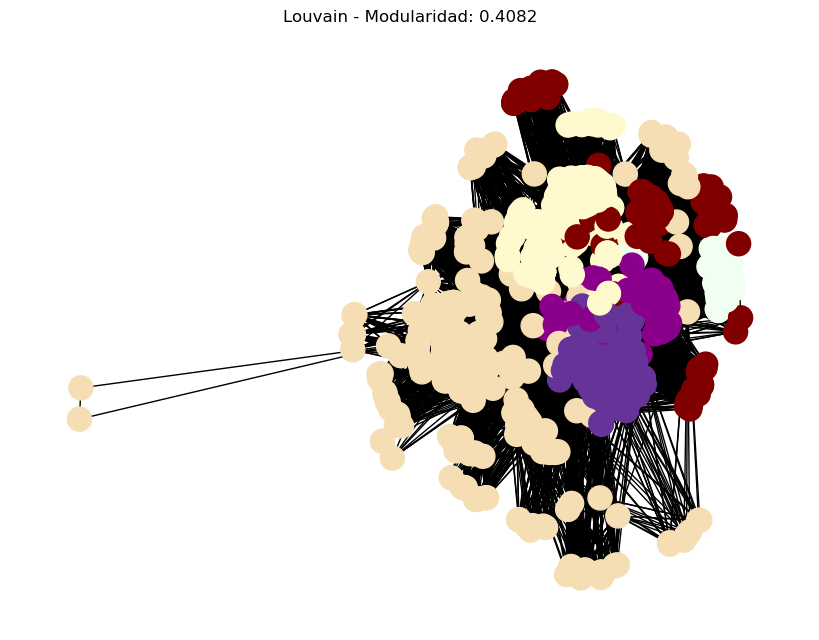

{'Louvain': {'communities': [],
  'modularity': 0.40822576862991417,
  'num_communities': 6}}

In [36]:
# Función para obtener una lista de colores aleatorios
def get_distinct_colors(n):
    colors = list(mcolors.CSS4_COLORS.keys())  # Lista de colores CSS
    random.shuffle(colors)  # Mezclar los colores
    return colors[:n]

# Función para calcular y graficar comunidades con colores distintos
def calculate_and_plot_communities(algorithm_name, communities, modularity_value, G, color_scheme):
    # Asignar colores a los nodos basados en la comunidad a la que pertenecen
    node_colors = {}
    for i, community in enumerate(communities):
        color = color_scheme[i]  # Obtener color específico para la comunidad
        for node in community:
            node_colors[node] = color  # Asignar el color

    colors = [node_colors[node] for node in G_proveedores.nodes()]
    plt.figure(figsize=(8, 6))
    nx.draw(G, node_color=colors, with_labels=False)
    plt.title(f"{algorithm_name} - Modularidad: {modularity_value:.4f}")
    plt.show()

# Aplicación del algoritmo de Louvain
communities_louvain = louvain_communities(G_proveedores, seed=42)
modularity_louvain = modularity(G_proveedores, communities_louvain)
num_communities_louvain = len(communities_louvain)  # Cantidad de comunidades encontradas

# Guardar los resultados en un diccionario
results = {
    "Louvain": {
        "communities": communities_louvain[:0],  
        "modularity": modularity_louvain,
        "num_communities": num_communities_louvain
    }
}

# Generar colores distintos para cada comunidad y graficar
distinct_colors_louvain = get_distinct_colors(num_communities_louvain)
calculate_and_plot_communities("Louvain", communities_louvain, modularity_louvain, G_proveedores, distinct_colors_louvain)

# Mostrar resultados
results

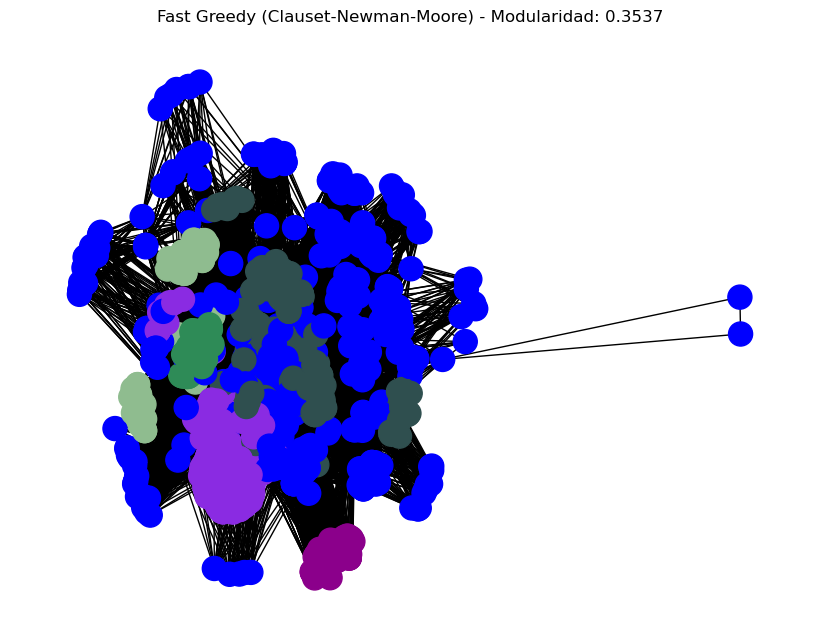

{'Fast Greedy (Clauset-Newman-Moore)': {'communities': [],
  'modularity': 0.3536790750716235,
  'num_communities': 6}}

In [77]:
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity

# Función para obtener una lista de colores aleatorios
def get_distinct_colors(n):
    colors = list(mcolors.CSS4_COLORS.keys())  # Lista de colores CSS
    random.shuffle(colors)  # Mezclar los colores
    return colors[:n]

# Función para calcular y graficar comunidades con colores distintos
def calculate_and_plot_communities(algorithm_name, communities, modularity_value, G, color_scheme):
    # Asignar colores a los nodos basados en la comunidad a la que pertenecen
    node_colors = {}
    for i, community in enumerate(communities):
        color = color_scheme[i]  # Obtener color específico para la comunidad
        for node in community:
            node_colors[node] = color  # Asignar el color

    colors = [node_colors[node] for node in G.nodes()]
    plt.figure(figsize=(8, 6))
    nx.draw(G, node_color=colors, with_labels=False)
    plt.title(f"{algorithm_name} - Modularidad: {modularity_value:.4f}")
    plt.show()

# Aplicación del algoritmo Fast Greedy (Clauset-Newman-Moore)
communities_fast_greedy = list(greedy_modularity_communities(G_proveedores))
modularity_fast_greedy = modularity(G_proveedores, communities_fast_greedy)
num_communities_fast_greedy = len(communities_fast_greedy)  # Cantidad de comunidades encontradas

# Guardar los resultados en un diccionario
results = {
    "Fast Greedy (Clauset-Newman-Moore)": {
        "communities": communities_fast_greedy[:0],  # Detalle de las primeras 10 comunidades
        "modularity": modularity_fast_greedy,
        "num_communities": num_communities_fast_greedy
    }
}

# Generar colores distintos para cada comunidad y graficar
distinct_colors_fast_greedy = get_distinct_colors(num_communities_fast_greedy)
calculate_and_plot_communities("Fast Greedy (Clauset-Newman-Moore)", communities_fast_greedy, modularity_fast_greedy, G_proveedores, distinct_colors_fast_greedy)

# Mostrar resultados
results


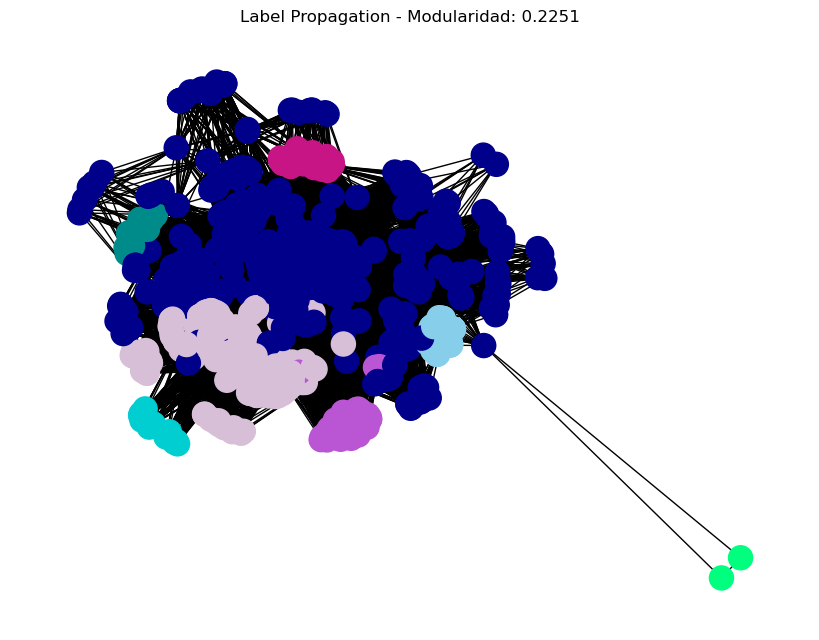

{'Label Propagation': {'communities': [],
  'modularity': 0.22508249013388185,
  'num_communities': 8}}

In [38]:
from networkx.algorithms.community import asyn_lpa_communities
from networkx.algorithms.community.quality import modularity

# Función para obtener una lista de colores aleatorios
def get_distinct_colors(n):
    colors = list(mcolors.CSS4_COLORS.keys())  # Lista de colores CSS
    random.shuffle(colors)  # Mezclar los colores
    return colors[:n]

# Función para calcular y graficar comunidades con colores distintos
def calculate_and_plot_communities(algorithm_name, communities, modularity_value, G, color_scheme):
    # Asignar colores a los nodos basados en la comunidad a la que pertenecen
    node_colors = {}
    for i, community in enumerate(communities):
        color = color_scheme[i]  # Obtener color específico para la comunidad
        for node in community:
            node_colors[node] = color  # Asignar el color

    colors = [node_colors[node] for node in G_proveedores.nodes()]
    plt.figure(figsize=(8, 6))
    nx.draw(G, node_color=colors, with_labels=False)
    plt.title(f"{algorithm_name} - Modularidad: {modularity_value:.4f}")
    plt.show()

# Aplicación del algoritmo de Propagación de Etiquetas (Label Propagation)
communities_label_propagation = list(asyn_lpa_communities(G_proveedores, seed=42))
modularity_label_propagation = modularity(G_proveedores, communities_label_propagation)
num_communities_label_propagation = len(communities_label_propagation)  # Cantidad de comunidades encontradas

# Guardar los resultados en un diccionario
results = {
    "Label Propagation": {
    "communities": communities_label_propagation[:0],  # Detalle de una comunidad como ejemplo
    "modularity": modularity_label_propagation,
    "num_communities": num_communities_label_propagation
    }
}

# Generar colores distintos para cada comunidad y graficar
distinct_colors_label_propagation = get_distinct_colors(num_communities_label_propagation)
calculate_and_plot_communities("Label Propagation", communities_label_propagation, modularity_label_propagation, G_proveedores, distinct_colors_label_propagation)

# Mostrar resultados
results
